# Assignment 2 - Computational Machine Learning
### Ignacio Roldán - s3823943

# Prepare environment

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Dataset: Appliances energy prediction Data Set (Modified)
This work discuss the evaluation of forecasting models for the Appliance energy prediction dataset (Candanedo et al., 2017). This is a modified version of the dataset where the light and appliance energy consumptions are merged together.

The dataset corresponds to 4.5 months of energy consumption in a low energy house located in Stambruges, Belgium. Most of the heating is done by chimney, and the focus is on energy consumption made by appliances (i.e Fridges, Washing machine, Dryer, Oven, Microwave, Dishwasher, desktop computers and laptops, video-game consoles, TVs). For full list see (Candanedo et al., 2017).

The available features in this dataset are:

- date time year-month-day hour:minute:second
- T1, Temperature in kitchen area, in Celsius 
- RH_1, Humidity in kitchen area, in % 
- T2, Temperature in living room area, in Celsius 
- RH_2, Humidity in living room area, in % 
- T3, Temperature in laundry room area 
- RH_3, Humidity in laundry room area, in % 
- T4, Temperature in office room, in Celsius 
- RH_4, Humidity in office room, in % 
- T5, Temperature in bathroom, in Celsius 
- RH_5, Humidity in bathroom, in % 
- T6, Temperature outside the building (north side), in Celsius 
- RH_6, Humidity outside the building (north side), in % 
- T7, Temperature in ironing room , in Celsius 
- RH_7, Humidity in ironing room, in % 
- T8, Temperature in teenager room 2, in Celsius 
- RH_8, Humidity in teenager room 2, in % 
- T9, Temperature in parents room, in Celsius 
- RH_9, Humidity in parents room, in % 
- To, Temperature outside (from Chievres weather station), in Celsius 
- Pressure (from Chievres weather station), in mm Hg 
- RH_out, Humidity outside (from Chievres weather station), in % 
- Wind speed (from Chievres weather station), in m/s 
- Visibility (from Chievres weather station), in km 
- Tdewpoint (from Chievres weather station), Â°C 
- rv1, Random variable 1, nondimensional 
- rv2, Random variable 2, nondimensional 
- TARGET_Energy, energy use of Appliances and light fixtures in the house in Wh 

Note that variables `rv1` and `rv2` where introduced to apply Boruta's algorithm for feature importance. This work will not use this procedure so these features will be removed from the dataset.

Energy consumption was recorded every 10 minutes.

In [2]:
# Load data
appliance = pd.read_csv("Data/UCI-electricity/UCI_data.csv", index_col='date', parse_dates=True)

# sort index
appliance = appliance.sort_index()

# Drop random values, they were fabricated to implement feature selecion
appliance = appliance.drop(['rv1', 'rv2'], axis = 1)

# Exploratory Data Analysis
### Data Structure
First step is to check the data structure, identify missing values, observe dimensionality and types of features. This will be done by using info()

In [3]:
# Information about the dataset
appliance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T1             19735 non-null  float64
 1   RH_1           19735 non-null  float64
 2   T2             19735 non-null  float64
 3   RH_2           19735 non-null  float64
 4   T3             19735 non-null  float64
 5   RH_3           19735 non-null  float64
 6   T4             19735 non-null  float64
 7   RH_4           19735 non-null  float64
 8   T5             19735 non-null  float64
 9   RH_5           19735 non-null  float64
 10  T6             19735 non-null  float64
 11  RH_6           19735 non-null  float64
 12  T7             19735 non-null  float64
 13  RH_7           19735 non-null  float64
 14  T8             19735 non-null  float64
 15  RH_8           19735 non-null  float64
 16  T9             19735 non-null  float64
 17  RH_9           

**Observation:** Information on the dataset shows no missing values. The size of the dataset is 19735 records, with a total of 25 features including the target variable. All features are real numbers except for `TARGET_energy`. This is not accurate as the target features can take decimal values.

In [4]:
# Change TRAGET_energy type to float
appliance['TARGET_energy'] = appliance['TARGET_energy'].astype('float')

### Summary Statistics and Visualisation
Summary statistics and simple data visualisations are used to identify outliers and understand the behaviour of the features.

In [5]:
# Show basic statistics
appliance.describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,TARGET_energy
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,...,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,101.496833
std,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,...,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,104.380829
min,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,...,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,10.000000
25%,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,...,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,50.000000
50%,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,...,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,60.000000
75%,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,...,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,100.000000
max,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,...,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,1110.000000


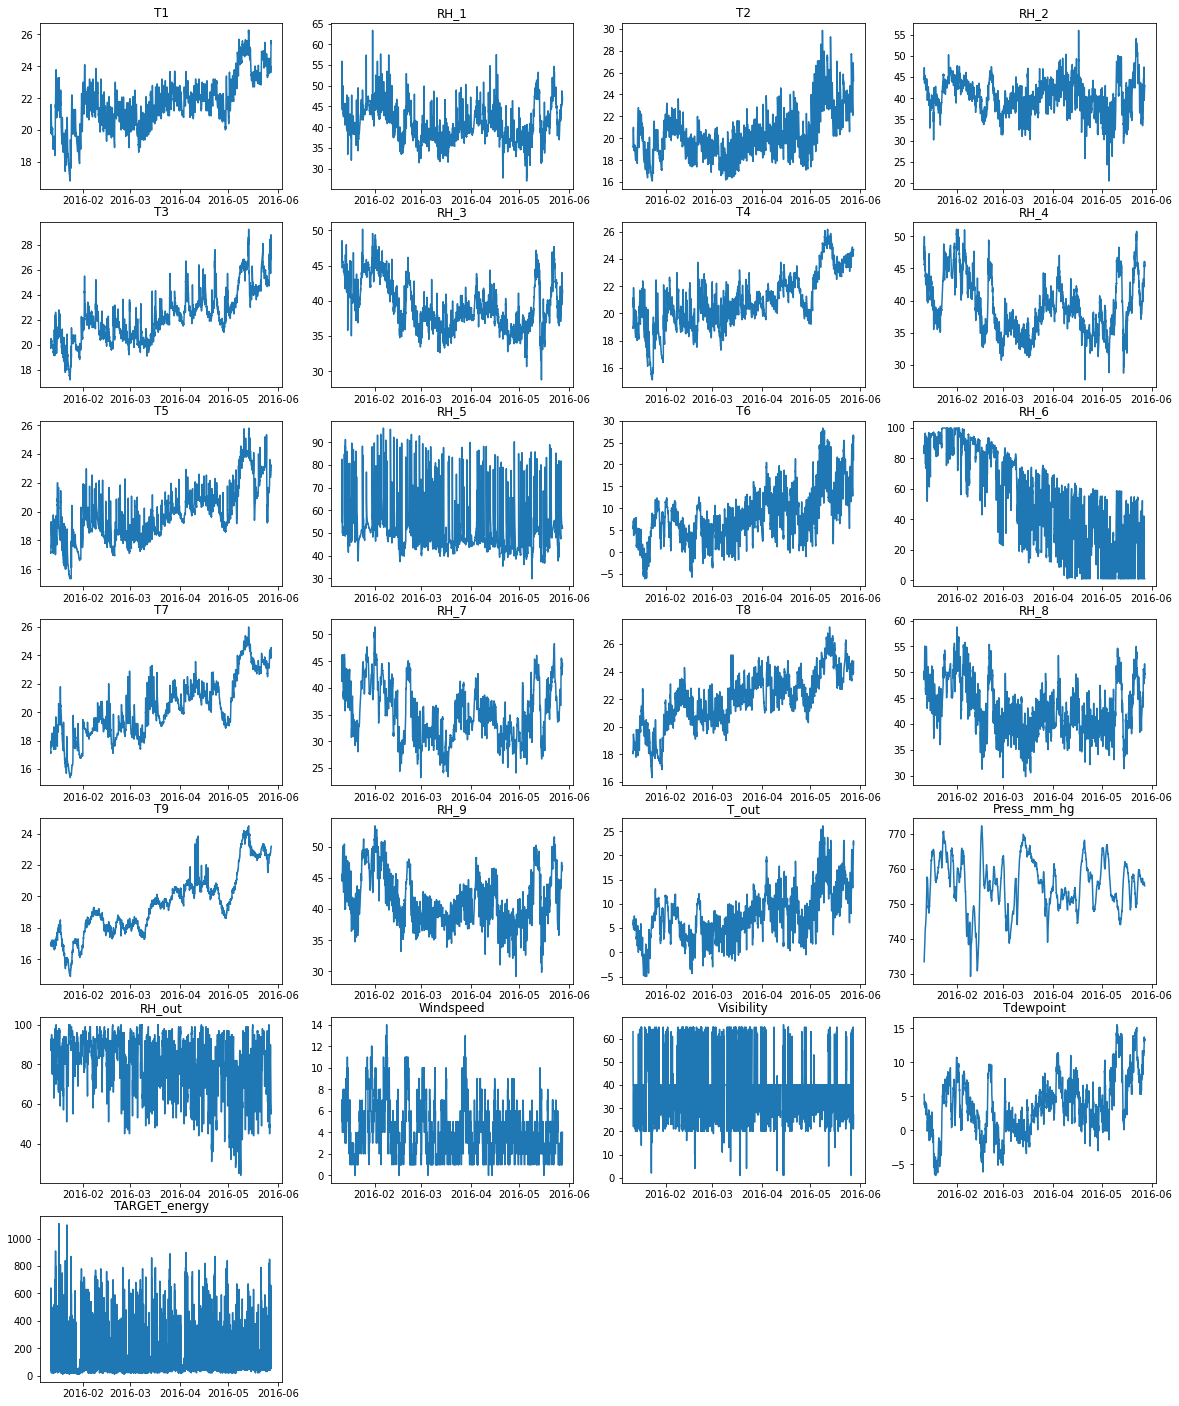

In [6]:
#Plot features
plt.figure(figsize=(20,25))
for i, column in enumerate(appliance.columns):
    ax = plt.subplot(7, 4, i+1)
    ax.plot(appliance[column])
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(column)

**Observation:** All variables appear to behave as expected, inside reasonable ranges. Also, temperature and Humidity levels inside the house seems to behave similarly. Humidity outside the building `RH_6` shows a different behaviour.

### Distribution of target variable
The distribution of the target variable is checked using violin and box plots. The objective is to understand the behavior of the energy consumption.

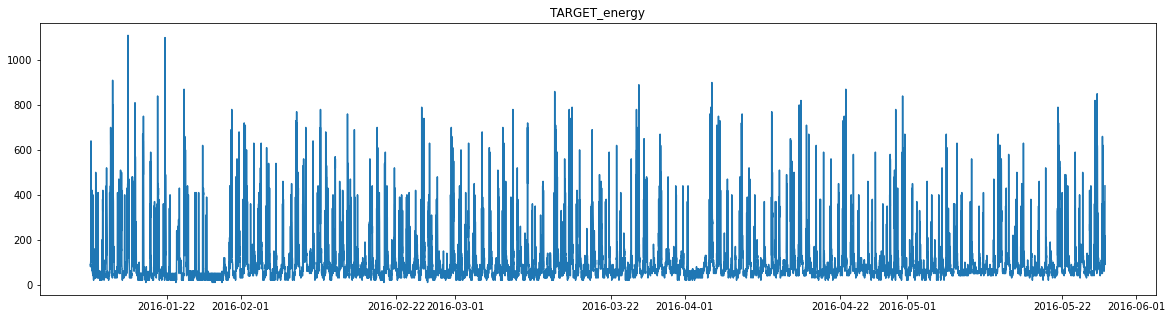

In [7]:
# Plot TARGET_energy
plt.subplots(1,1,figsize=(20,5))

plt.plot(appliance['TARGET_energy'])
plt.title('TARGET_energy')
plt.show()

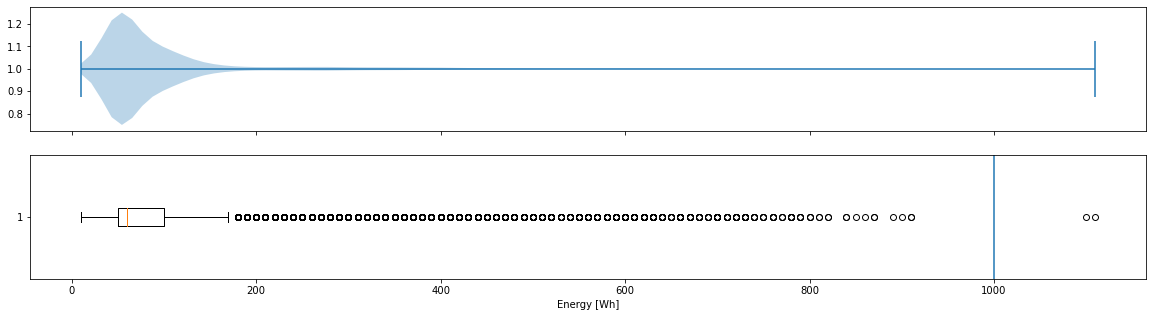

In [8]:
# Target variable distribution
q3, q1 = np.percentile(appliance['TARGET_energy'], [75 ,25])
iqr = q3 - q1

fig, ax = plt.subplots(2,1,figsize=(20,5), sharex = True)
ax[0].violinplot(appliance['TARGET_energy'], vert = False)
ax[1].boxplot(appliance['TARGET_energy'], vert = False)
ax[1].axvline(q3+iqr*18)
plt.xlabel("Energy [Wh]")
plt.show()

**Observation:** Energy consumption distribution is positively skewed. It shows high energy consumption in rare occasion but most of the time it is between 40-60 Wh. Minimum values is 10 Wh, it never reaches 0 due the use of appliances like Fridges that are not disconnected. 

Two outliers stand out over the rest, it is possible to consider removing them from the dataset, although there is no evidence that these values are incorrect, and it may be important to consider them. 

> **Action:** Create a new feature `over1000Wh` with value 1 for all energy values greater than `Q3+18\*IQR = 1000 Wh`. This will be done to let the model decide what to do with the outliers.

### Correlation between features
Scatterplots by the Target variable and a correlation matrix heatmap are used to understand how features are correlated to the target variable and to each other

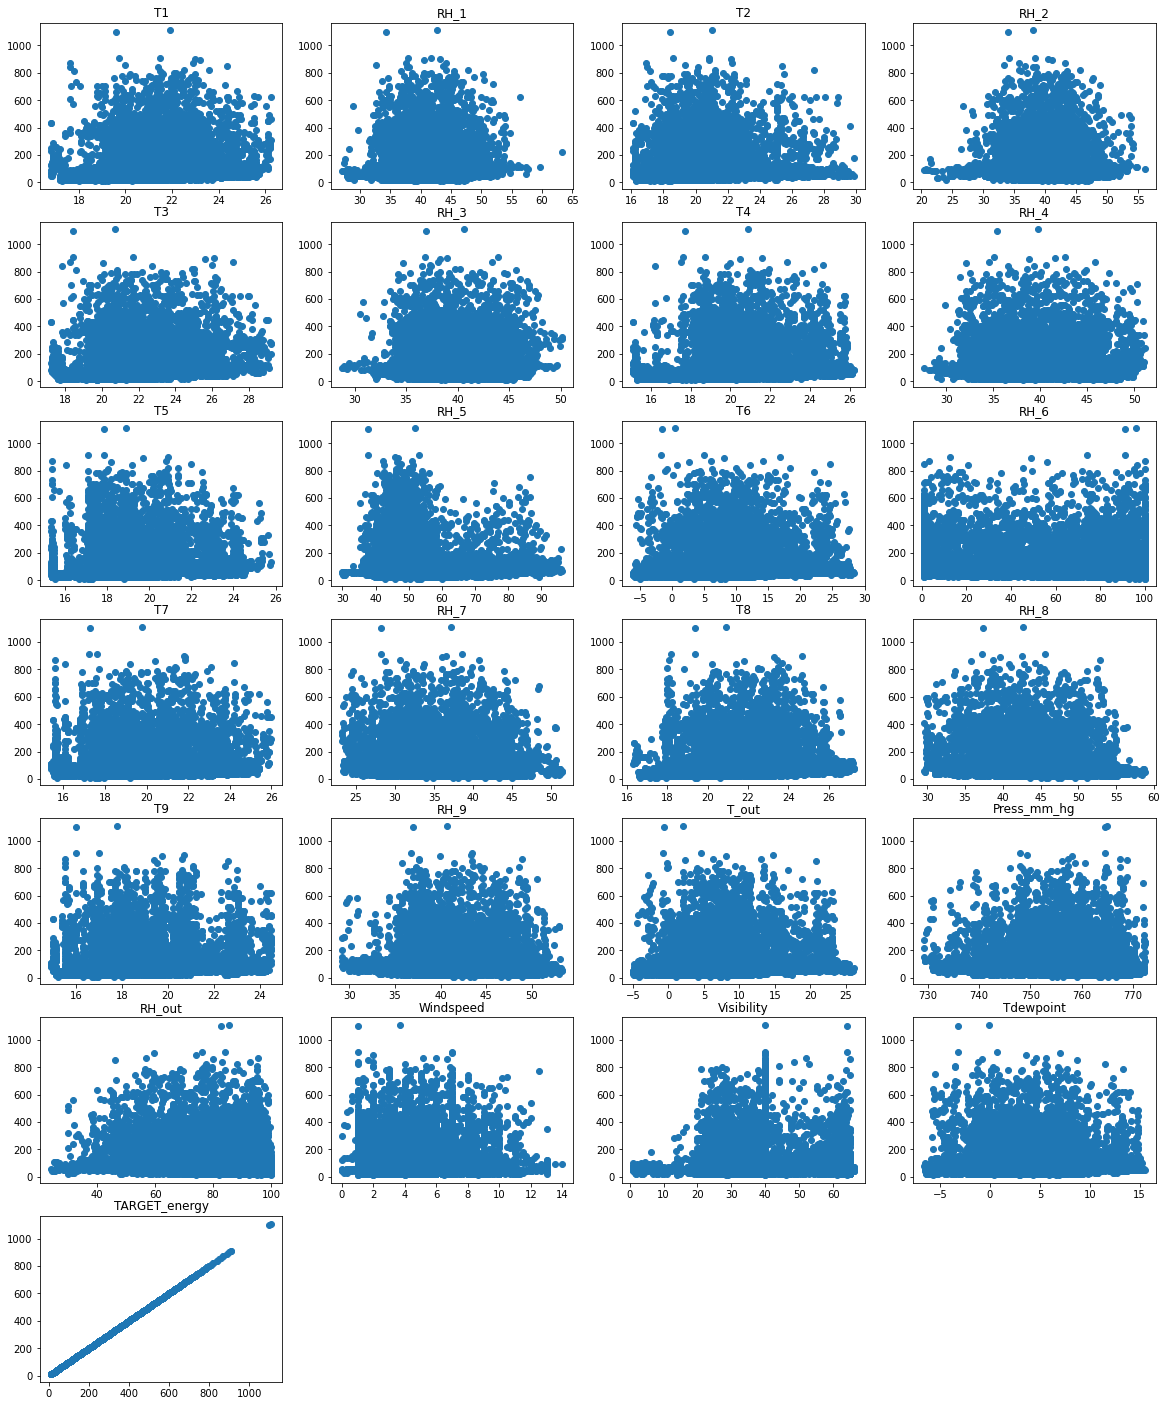

In [9]:
# Scatter plot by target_energy 
plt.figure(figsize=(20,25))
for i, column in enumerate(appliance.columns):
    plt.subplot(7, 4, i+1)
    plt.scatter(appliance[column], appliance['TARGET_energy'])
    plt.title(column)

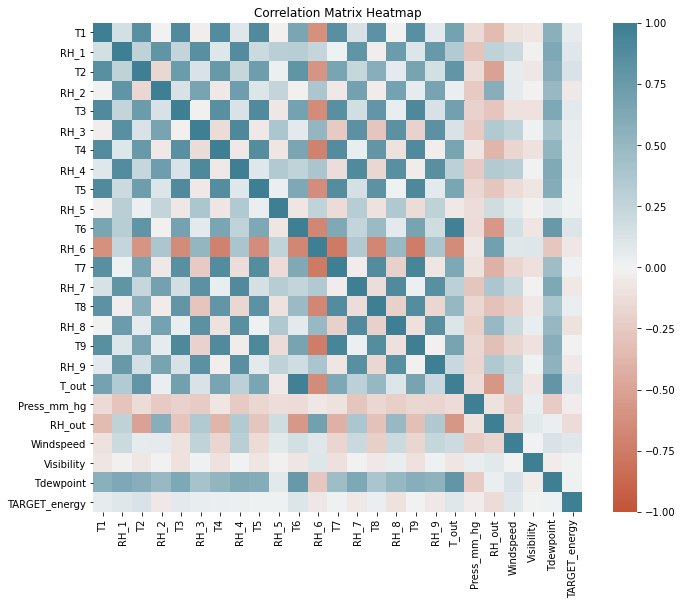

In [10]:
# Correlation matrix
plt.figure(figsize=(11,9))

sns.heatmap(
    appliance.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

plt.title("Correlation Matrix Heatmap")
plt.show()

**Observation:** Results show that none of the current features are correlated to the target variable. However, they exhibit high correlation to each other, especially in features of similar measurements. It may be necessary to implement feature selection.

> **Action:** Implement PCA for feature selection after train-test split.

### Seasonality
An Autocorrelation Function (ACF) curve is shown to identify seasonality in the target variable.

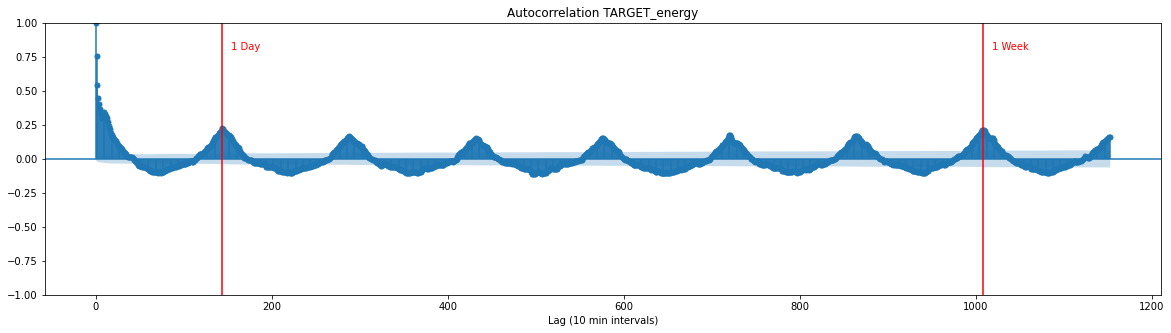

In [11]:
# Autocorrelation Function, used to identify seasonality (Red line in 1 week time)
import statsmodels.api as sm
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20,5

sm.graphics.tsa.plot_acf(appliance['TARGET_energy'], lags = 6*24*(7+1))
plt.axvline(6*24, color = 'r')
plt.text(x = 6*24+10, y = 0.8, s="1 Day",color = 'r')
plt.axvline(6*24*7, color = 'r')
plt.text(x = 6*24*7+10, y = 0.8, s="1 Week",color = 'r')
plt.title("Autocorrelation TARGET_energy")
plt.xlabel("Lag (10 min intervals)")
plt.show()

**Observation:** The ACF curve shows signs of autocorrelation in close lag features and in each 6\*24 (1 Day) lags. This is evidency of seasonality in the energy data per day.

A heatmap is used to visualise the average energy comsumption during the day for each day of the week.

> **Action:** Create features `day_of_week` and `hour_of_day` to capture variability during the day and the week.

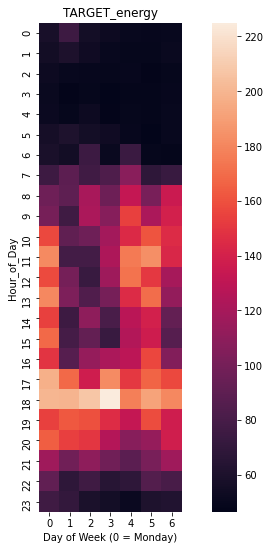

In [12]:
# Create features for day of the week and hour of the day.
day_of_week = appliance.index.dayofweek
hour_of_day = appliance.index.hour

appliance.insert(0, "Day_of_Week", day_of_week)
appliance.insert(0, "Hour_of_Day", hour_of_day)

#Heatmap of average energy consumption during a week
energy_day_hour_matrix = appliance[['Hour_of_Day', 'Day_of_Week', 'TARGET_energy']].pivot_table(index=['Hour_of_Day'],columns='Day_of_Week',values='TARGET_energy')

plt.figure(figsize=(11,9))

sns.heatmap(
    energy_day_hour_matrix, 
    square=True
)

plt.title("TARGET_energy")
plt.xlabel("Day of Week (0 = Monday)")
plt.show()

**Observation:** The heatmap clearly shows a pattern of energy consumption during the day. In early hours of the day (from midnight to 6:00 AM), there is a low energy consumption; then, the energy usage goes up until 21:00 to 22:00 PM. Also, during the midweek, the energy usage does not show a high increment until 17:00 PM.

From what is shown in the heatmap and in the ACF Curve, the following actions are suggested.

> **Action:** Create a new dummy variable `midweek`, indicating that the day is midweek (From Tuesday to Thursday).

> **Action:** Replace `Hour_of_Day` with a continuous version of the same feature.

> **Action:** Create lag features of energy with lag = (1, 6, 6*24), equivalent to 10 minutes, 1 hour and 1 day.

\**Note: In this case it is assumed that the previous values of energy consumption are known at the moment of forecasting. For real unseen data these values must be estimated.*

In [13]:
# Create midweek
appliance.insert(2, 'midweek', np.multiply((appliance['Day_of_Week'] >= 1) & (appliance['Day_of_Week'] <= 3),1))

# Modify hour_of_day
appliance['Hour_of_Day'] = appliance.index.hour.values.astype('float64') + appliance.index.minute.values.astype('float64')/60.0

In [14]:
#Create lag features
appliance['energy_lag1Day'] = appliance['TARGET_energy'].shift(-6*24)
appliance['energy_lag1Hour'] = appliance['TARGET_energy'].shift(-6)
appliance['energy_lag10min'] = appliance['TARGET_energy'].shift(-1)

#Drop NA columns
appliance = appliance.dropna()

### Seasonal Decomposition
A Seasonal-Trend decomposition using LOESS (STL) is used to evaluate if seasonality and trend can be predicted separately.

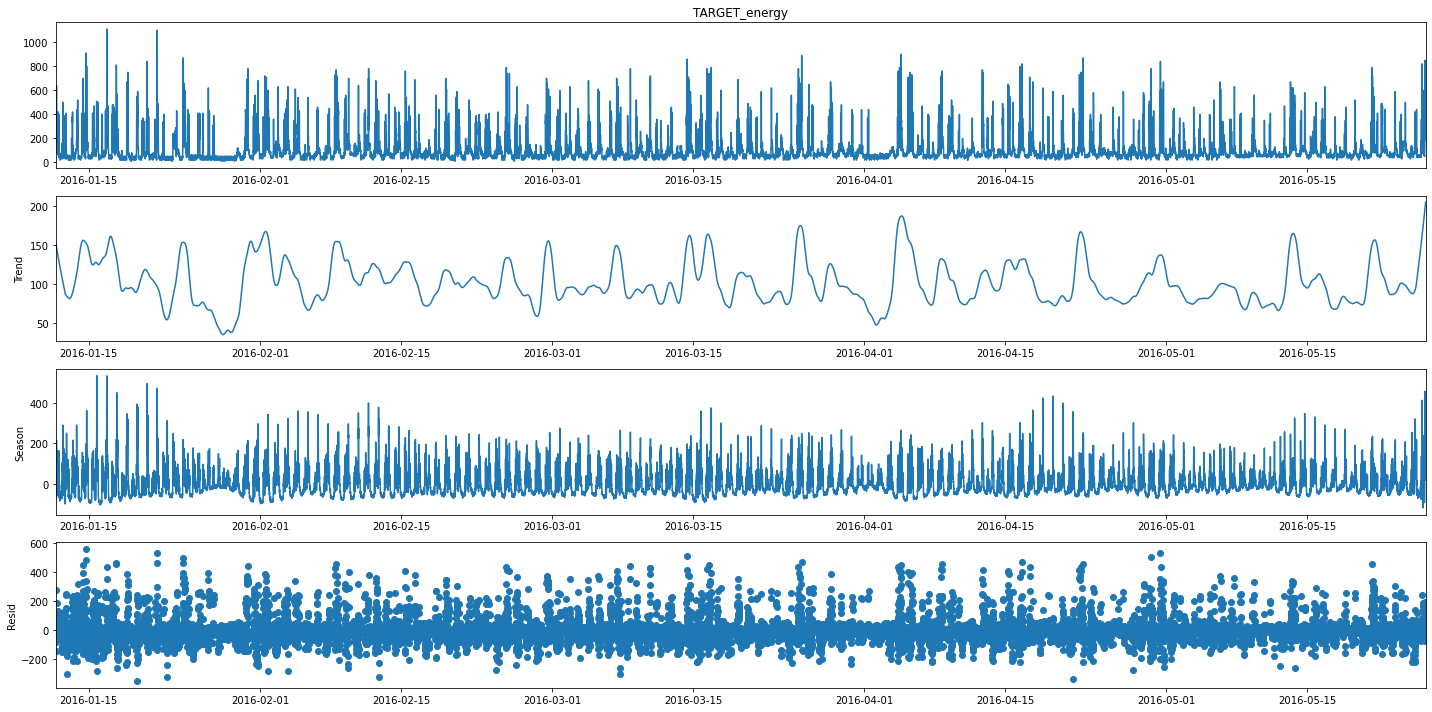

In [15]:
from statsmodels.tsa.seasonal import STL

rcParams['figure.figsize'] = 20,10

stl_decom = STL(appliance['TARGET_energy'], period = 6*24).fit()
stl_decom.plot()
plt.show()

**Observation:** The STL decomposition shows a seasonality with high variation, STL allows seasonality to change over time but changes are expected to be small. Also, residuals do not show a normal distribution, meaning that there is variance not captured by the decomposition. It is preferred to use a model that can capture the seasonality instead of predicting it separately.

# Evaluation Framework

## Objective
The objective of this experiment is to evaluate a forecasting model for the energy variable in the *Appliance energy prediction dataset* that performs good for unseen data.

A **R<sup>2</sup>** measure will be used to evaluate performance with other research publications. This performance measure is easier to compare with other research studies in the same dataset (Candanedo et al.,2017; Feng & Feng, 2021; Munkhdalai, 2022).

The original datset considers only energy used by appliances as the target variable, in our case, it is the total energy (appliances + lights), for this reason, other measurements like RMSE or MAE are not comparable.

It is expected to achieve a R<sup>2</sup> close to **0.57**, replicating the results in Candanedo et al. (2017).

## Experiment Setup
The experiment setup will consider:

- A test split with 25% of the data.
- 5-fold time series cross validation for hyper-parameter tunning.
- R<sup>2</sup> as performance measure.

The dataset corresponds to a time series, in this type of data, random splits can cause data leakage and meaningless splits (predicting the past using the future). Train-Test split and 5-fold cross validation will not be picked randomly, instead: 

- Last 25% of records will be kept for testing.
- A variation of k-fold cross validation for time series will be used, the implementation is done by the function TimeSeriesSplit from Scikit-learn (Pedregosa Et. al, 2011) 

Justification of this approach is discussed in Hyndman & Athanasopoulos (2021).

\**Note: The original work did not treat the dataset strictly as time series and used random split and random cross validation. For this reason, performance results are higher than expected. In this work, the time component of the data is considered, including lag features to reflect this.*

Now some functions are defined to setup the experiment. Some of this code is based in the Week 5 Lab of Machine Learning Course (RMIT, 2022)

In [16]:
# Create function to evaluate model
from sklearn.metrics import mean_squared_error, r2_score
import math

def evaluateModel(model, train_X, train_y, test_X, test_y, score_func = r2_score):
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    
    train_score = 0
    test_score = 0
    
    train_score = score_func(train_y, pred_train)
    test_score = score_func(test_y, pred_test)
    
    scores = {
      "train": train_score,
      "test": test_score
    }
    
    return scores

In [17]:
# Creat function to run CV
from sklearn.model_selection import TimeSeriesSplit

def crossVal(model, train_X, train_y, k=5, score_func = r2_score):
    
    tscv = TimeSeriesSplit(n_splits=k)
    train_scores = []
    test_scores = []    
    
    for train_index, val_index in tscv.split(train_X):
        train_X_CV = train_X.iloc[train_index]
        train_y_CV = train_y.iloc[train_index]

        val_X_CV = train_X.iloc[val_index]
        val_y_CV = train_y.iloc[val_index]
        
        model.fit(train_X_CV, train_y_CV)
        iter_res = evaluateModel(model, train_X_CV, train_y_CV, val_X_CV, val_y_CV, score_func)
        
        train_scores.append(iter_res["train"])
        test_scores.append(iter_res["test"])
    
    scores = {
      "train": np.array(train_scores),
      "test": np.array(test_scores)
    }
    
    return scores

In [18]:
def plotCV(cv_results, plot_train = True):
    
    fig, ax = plt.subplots()
    params = cv_results.keys()

    val_means = [np.mean(cv_results[para]['test']) 
                 for para in params]

    val_std = [np.std(cv_results[para]['test']) 
               for para in params]

    ax.errorbar([para for para in params], 
                val_means,
                yerr=val_std)
    
    if plot_train:
        train_means = [np.mean(cv_results[para]['train']) 
                       for para in params]

        train_std = [np.std(cv_results[para]['train']) 
                     for para in params]

        ax.errorbar([para for para in params], 
                    train_means,
                    yerr=train_std)

    return ax

In [19]:
def plotSingleCV(ax, cv_results, plot_train = True):
    
    params = cv_results.keys()

    val_means = [np.mean(cv_results[para]['test']) 
                 for para in params]

    val_std = [np.std(cv_results[para]['test']) 
               for para in params]

    ax.errorbar([para for para in params], 
                val_means,
                yerr=val_std)
    
    if plot_train:
        train_means = [np.mean(cv_results[para]['train']) 
                       for para in params]

        train_std = [np.std(cv_results[para]['train']) 
                     for para in params]

        ax.errorbar([para for para in params], 
                    train_means,
                    yerr=train_std)

In [20]:
def printCVResults(cv_results):
    val_means = np.mean(cv_results['test']) 

    val_std = np.std(cv_results['test']) 

    train_means = np.mean(cv_results['train']) 

    train_std = np.std(cv_results['train'])
    
    #print('val_means: ' + str(val_means))
    #print('val_std: ' + str(val_std))
    #print('train_means: ' + str(train_means))
    #print('train_std: ' + str(train_std))
    
    resp = {
        'val_means': val_means,
        'val_std': + val_std,
        'train_means': train_means,
        'train_std': + train_std    
    }
    
    return resp

# Data Preparation
## Data Split

In [21]:
# Split data
import math

train_size = 0.75
split_ind = int(math.ceil(len(appliance)*train_size))+1  # + 1 to include the last values in the train split

train_X = appliance[:split_ind].drop('TARGET_energy', axis = 1)
train_y = appliance['TARGET_energy'][:split_ind]

test_X = appliance[split_ind:].drop('TARGET_energy', axis = 1)
test_y = appliance['TARGET_energy'][split_ind:]

## PCA Analysis
Features in the original dataset presented high correlation with each other. PCA is used in this case to reduce redundancy and only keep features with high explained variance. The selection criterion will be the elbow method, or the number of features that explain at least a 95% of the variance if the elbow occurs before this threshold.

[0.63935226 0.75187857 0.83112396 0.88733163 0.933051   0.97167637
 0.97920043 0.98422218 0.98812319 0.99087774 0.99307221 0.99491068
 0.99664346 0.9975576  0.99810871 0.99857765 0.99895494 0.99927506
 0.99952327 0.99970487 0.99984274 0.99993187 0.99997467 1.        ]


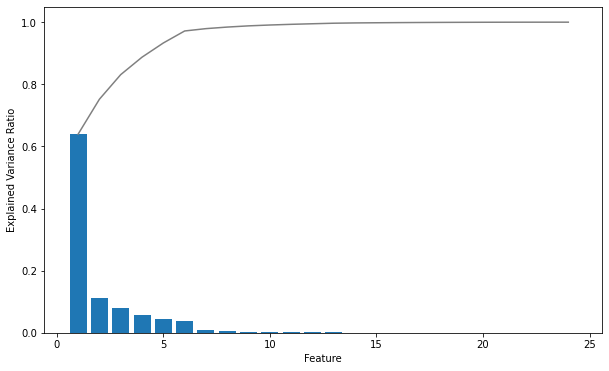

In [22]:
# Code based in Week 11 lab
from sklearn.decomposition import PCA

rcParams['figure.figsize'] = 10,6

numeric_predictors = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']
num_comp = len(numeric_predictors)

pca = PCA(n_components=num_comp).fit(train_X[numeric_predictors])

print(pca.explained_variance_ratio_.cumsum())
plt.bar(np.arange(1,num_comp+1), pca.explained_variance_ratio_)
plt.plot(np.arange(1,num_comp+1) , pca.explained_variance_ratio_.cumsum(), c='gray')
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Feature")
plt.show()


In this case, the elbow shape occurs in feature number 6, with a total explained variance of 97%.

In [23]:
# Transform numeric features with 6 first principal components linear combination in train and test splits
n_comp = 6

pca = PCA(n_components=n_comp).fit(train_X[numeric_predictors])
pca_features_train = pca.transform(train_X[numeric_predictors])
pca_features_test = pca.transform(test_X[numeric_predictors])

In [24]:
# Replace Principal components in train and test datasets

# Drop original features
train_X.drop(numeric_predictors, axis=1, inplace=True)
test_X.drop(numeric_predictors, axis=1, inplace=True)

# Insert Principal Components
for i in range(n_comp):
    PC_name = 'PC' + str(i+1)
    train_X[PC_name] = pca_features_train[:,i]
    test_X[PC_name] = pca_features_test[:,i]


## One-Hot Encoding of Day of Week
`Day_of_Week` is now of type integer, but it must be treated as a categorical variable. A one-hot encoder is applied to reflect this in our model.

\**Note: This encoding introduces perfect collinearity in the train dataset. In models that this is an issue (e.g. Unregularized Linear Regressions), a base group should be removed from the train dataset. In cases like this, the first group (0 / Monday) will be used as base group.* 

In [25]:
# OneHot enconding to Week_of_Day
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder_Day_of_Week = OneHotEncoder(sparse = False)
OneHotEncoder_Day_of_Week.fit(train_X[['Day_of_Week']])

OneHot_Day_of_Week_train = OneHotEncoder_Day_of_Week.transform(train_X[['Day_of_Week']])
OneHot_Day_of_Week_test = OneHotEncoder_Day_of_Week.transform(test_X[['Day_of_Week']])

In [26]:
# Replace Week_of_Day in train and test splits
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

train_X.drop('Day_of_Week', axis=1, inplace=True)
test_X.drop('Day_of_Week', axis=1, inplace=True)

for i in range(len(weekDays)):
    train_X[weekDays[i]] = OneHot_Day_of_Week_train[:,i]
    test_X[weekDays[i]] = OneHot_Day_of_Week_test[:,i]

## Exclude Outliers
In this case, energy values over `1000 Wh` will be considered outliers in the training dataset. But, instead of removing them, as suggested in Hyndman & Athanasopoulos (2021), we will let the models decide what to do with them. For this, a new feature `over1000Wh` will be introduce, with value 1 if energy is > 1000 Wh. For the testing dataset, this feature will be assumed to be 0.

In [27]:
train_X['over1000Wh'] = np.multiply((train_y > 1000),1)
test_X['over1000Wh'] = 0

# Forecasting Models
The target variable did not show signs of linear correlation with other features, nor any kind of recognisable pattern that would suggest a polynomial relationship. For this, polynomial regression does not appear to be a good choice for predicting the energy consumption.

This work will look at tree-based regression models with bagging and boosting: Random Forest and XGBoost. The evaluation process of each model will be as follows:

- First look, initial model with no (or sampled) hyperparameter tuning.
- Single hyperparameter tuning to visualise possible ranges for grid search.
- Grid search for hyperparameter tuning (Max 3 parameters)
- Evaluation of the model removing lag features. This is done to understand the model capacity to predict the energy consumption without knowing past energy values.

## Model 1: Random Forest
### First Look (Base Model)

In [28]:
# First Look
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(n_estimators = 50, random_state=0)

printCVResults(crossVal(model_RF, train_X, train_y))

{'val_means': 0.5156809764001776,
 'val_std': 0.06263126324914456,
 'train_means': 0.942341162674459,
 'train_std': 0.00171518451324691}

### Tuning Max Number of Features

In [29]:
# Tuning max_features only
max_features_params = np.arange(1, len(train_X.columns), dtype=int)
cv_results = dict()

for param in max_features_params:
    
    model_RF = RandomForestRegressor(max_depth = 6, max_features = param, n_estimators = 50, random_state=0)
    cv_results[param] = crossVal(model_RF, train_X, train_y)

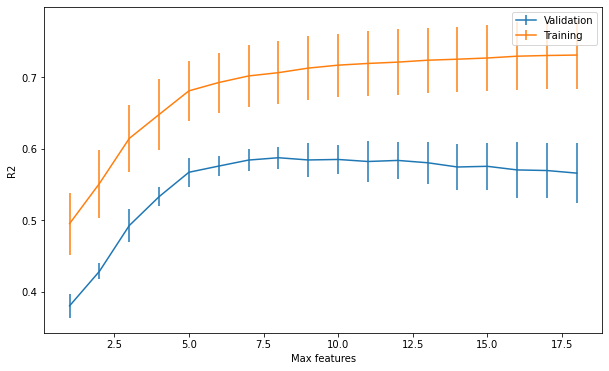

In [30]:
#Plot results of CV for different max_features
plotCV(cv_results)
plt.ylabel('R2')
plt.xlabel('Max features')
plt.legend(['Validation','Training',])
plt.show()

### Tuning Max Depth

In [31]:
# Tuning max_depth with max_features fixed to 8
from sklearn.ensemble import RandomForestRegressor

max_depth_params = np.arange(1, 7, dtype=int)
cv_results = dict()

for param in max_depth_params:
    
    model_RF = RandomForestRegressor(max_depth = param, max_features = 8, n_estimators = 50, random_state=0)
    cv_results[param] = crossVal(model_RF, train_X, train_y)

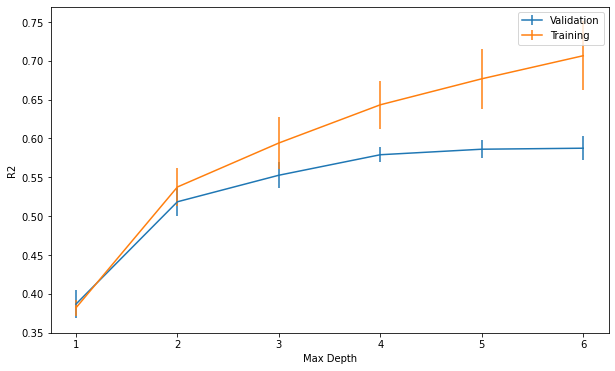

In [32]:
#Plot results of CV for different max_depth with max_features = 3
plotCV(cv_results)
plt.ylabel('R2')
plt.xlabel('Max Depth')
plt.legend(['Validation','Training',])
plt.show()

### Tuning Number of Estimators (Trees)

In [33]:
# Tuning n_estimators
from sklearn.ensemble import RandomForestRegressor

n_estimators_params = np.arange(25, 151, 25, dtype=int)
cv_results = dict()

for param in n_estimators_params:
    
    model_RF = RandomForestRegressor(max_depth = 5, max_features = 8, n_estimators = param, random_state=0)
    cv_results[param] = crossVal(model_RF, train_X, train_y)

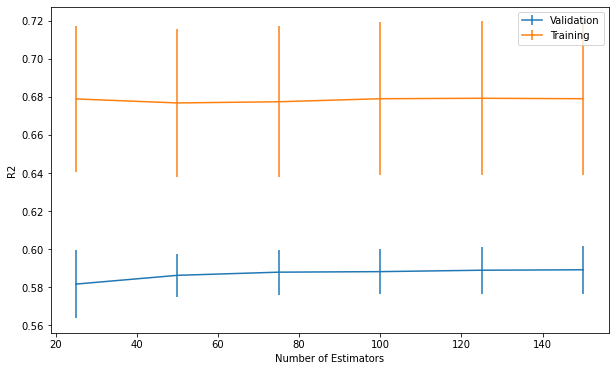

In [34]:
# Plot results of CV for different n_estimators
plotCV(cv_results)
plt.ylabel('R2')
plt.xlabel('Number of Estimators')
plt.legend(['Validation','Training',])
plt.show()

### Grid Search

In [35]:
# Grid Search Random Forest
max_depth_params = np.arange(2, 6, dtype=int)
n_estimators_params = np.arange(100, 301, 100, dtype=int)
max_features_params = np.arange(8, 15, dtype=int)

grid_results_RF = dict()
best_params = dict()
best_score = -10

for max_depth_param in max_depth_params:
    
    iter_res = dict()
    
    for n_estimators_param in n_estimators_params:
        
        iter2_res = dict()
    
        for max_features_param in max_features_params:

            model_RF = RandomForestRegressor(max_depth = max_depth_param, 
                                             max_features = max_features_param, 
                                             n_estimators = n_estimators_param, 
                                             random_state=0)

            iter_cv = crossVal(model_RF, train_X, train_y)
            iter2_res[max_features_param] = iter_cv

            iter_score = np.mean(iter_cv['test'])

            if iter_score > best_score:

                best_score = iter_score

                best_params = {
                    'max_depth': max_depth_param,
                    'max_features': max_features_param,
                    'n_estimators': n_estimators_param,
                    'score': best_score
                }

                print('Best r2 score: ' + str(best_score))
        
        iter_res[n_estimators_param] = iter2_res
            
    grid_results_RF[max_depth_param] = iter_res

Best r2 score: 0.5249559210386476
Best r2 score: 0.542949722774545
Best r2 score: 0.5468592154327832
Best r2 score: 0.5692937028723615
Best r2 score: 0.5754680364738065
Best r2 score: 0.5788426669633179
Best r2 score: 0.5804572186847182
Best r2 score: 0.5833082129762556
Best r2 score: 0.5894677685727754
Best r2 score: 0.5899514359991839
Best r2 score: 0.5923884961727548
Best r2 score: 0.593441083879233
Best r2 score: 0.5939864767606232


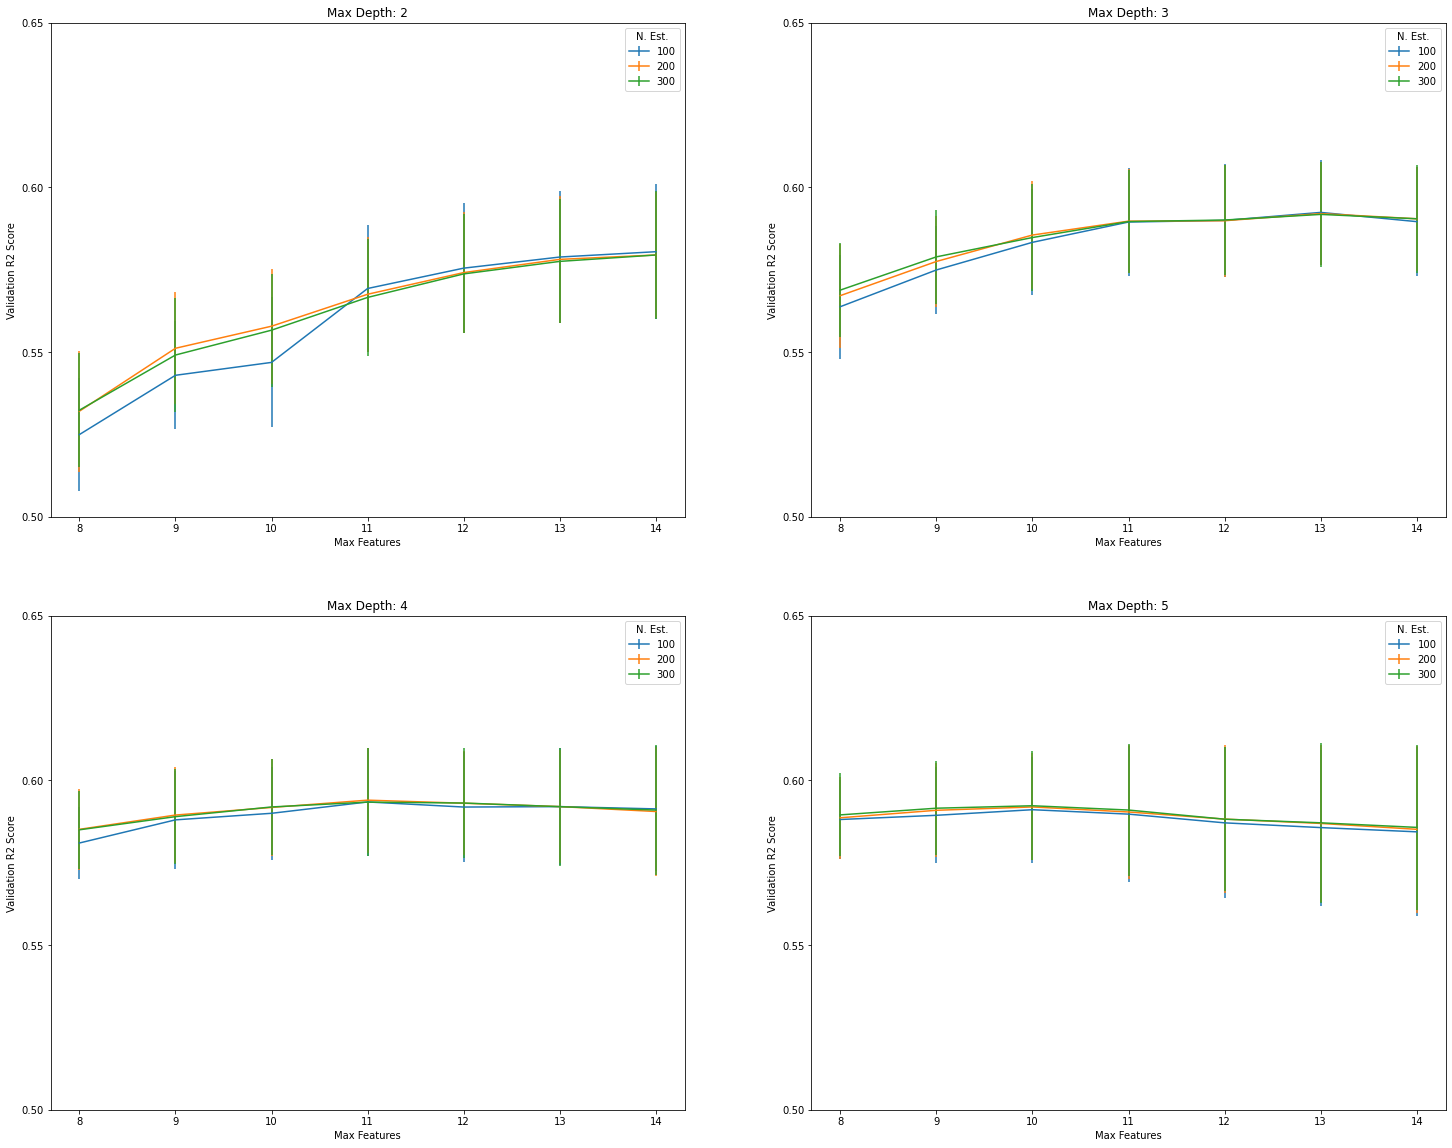

In [36]:
# Plot grid search
plt.figure(figsize=(25,20))
for i, param_1 in enumerate(grid_results_RF.keys()):
    ax = plt.subplot(2, 2, i+1)
    for param_2 in grid_results_RF[param_1].keys():
        plotSingleCV(ax, grid_results_RF[param_1][param_2], plot_train=False)

    plt.legend(grid_results_RF[param_1].keys(), title="N. Est.")
    plt.xlabel("Max Features")
    plt.ylabel("Validation R2 Score")
    plt.yticks(np.arange(0.5, 0.7, 0.05))
    plt.title('Max Depth: ' + str(param_1))

In [37]:
# Parameters where best R2 was found
best_params

{'max_depth': 4,
 'max_features': 11,
 'n_estimators': 200,
 'score': 0.5939864767606232}

### Random Forest Details
#### Training model after hyperparameter tuning

In [38]:
# Model trained with final parameters
model_RF = RandomForestRegressor(max_features = 11, max_depth = 4, n_estimators = 200, random_state=0)

printCVResults(crossVal(model_RF, train_X, train_y))

{'val_means': 0.5939864767606232,
 'val_std': 0.015961249793926265,
 'train_means': 0.6672122818002935,
 'train_std': 0.03479294678771204}

#### Feature Importance (Full Model)

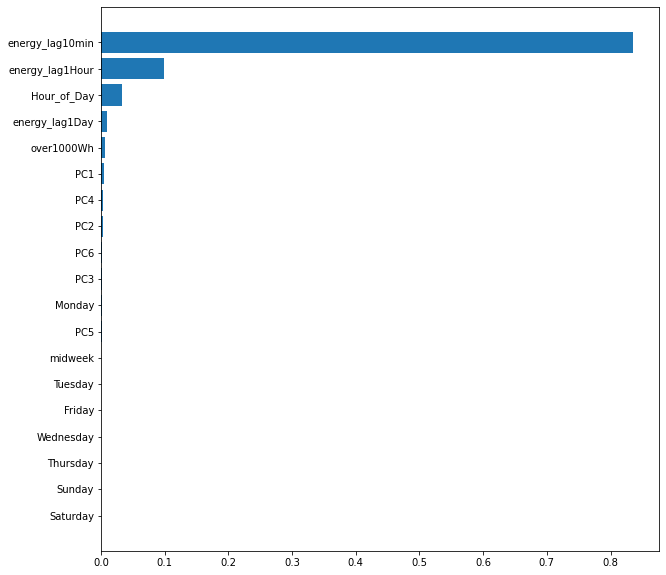

In [39]:
# Plot feature importance
sorted_idx = model_RF.feature_importances_.argsort()

plt.figure(figsize=(10,10))
plt.barh(train_X.columns[sorted_idx], model_RF.feature_importances_[sorted_idx])
plt.show()

#### Results after removing lag features

In [40]:
# Comparing performance when removing lag features
lag_features = ['energy_lag10min', 'energy_lag1Hour', 'energy_lag1Day']

cv_results = dict()

for i in range(4):
    cv_results[i] = crossVal(model_RF, train_X.drop(lag_features[0:i], axis=1), train_y)

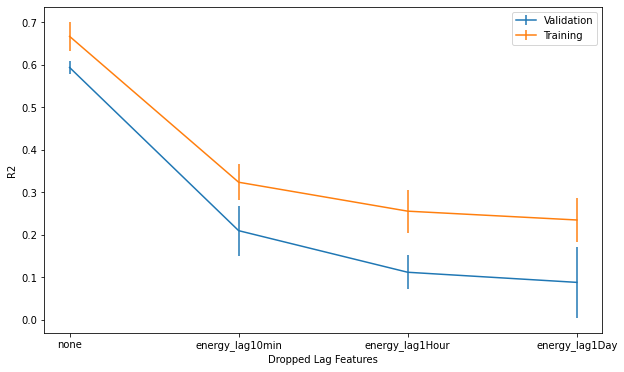

In [41]:
#Plot results of CV for different n_estimators
plotCV(cv_results)
plt.ylabel('R2')
plt.xlabel('Dropped Lag Features')
plt.xticks([0, 1, 2, 3], ['none', 'energy_lag10min', 'energy_lag1Hour', 'energy_lag1Day']) 
plt.legend(['Validation','Training',])
plt.show()

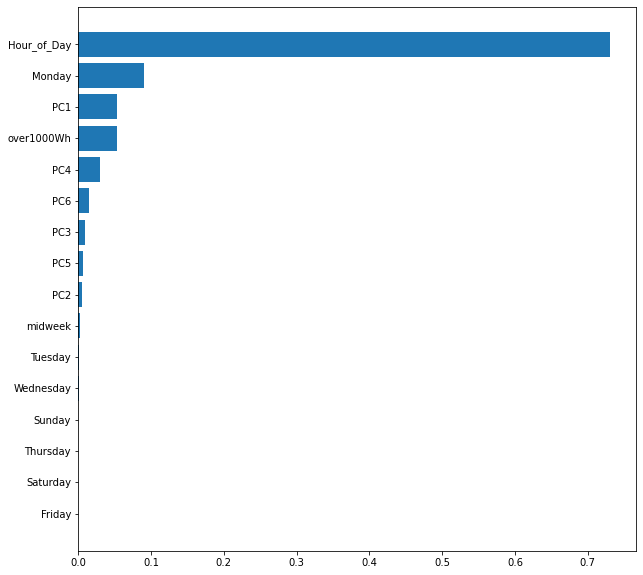

In [42]:
# Plot feature importance
sorted_idx = model_RF.feature_importances_.argsort()

plt.figure(figsize=(10,10))
plt.barh(train_X.drop(['energy_lag10min', 'energy_lag1Hour', 'energy_lag1Day'], axis=1).columns[sorted_idx], model_RF.feature_importances_[sorted_idx])
plt.show()

In [43]:
# Model trained with no lag features
printCVResults(crossVal(model_RF, train_X.drop(lag_features, axis=1), train_y))

{'val_means': 0.08807731837775867,
 'val_std': 0.08402121931870453,
 'train_means': 0.2349286503438334,
 'train_std': 0.05271179757417276}

## Model 2: XGBoost
### First Look (Base Model)

In [44]:
# Base Model
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                          max_depth = 5,
                          learning_rate = 0.5,
                          n_estimators = 50,
                         )

printCVResults(crossVal(xg_reg, train_X, train_y))

{'val_means': 0.45629689339096985,
 'val_std': 0.028138258313249495,
 'train_means': 0.9035501308912371,
 'train_std': 0.04102813642514728}

### Tuning Max Depth

In [45]:
# Tuning max_depth with learning Rate = 0.5
import xgboost as xgb

max_depth_params = np.arange(1, 7, dtype=int)
cv_results = dict()

for param in max_depth_params:
    
    model_XGB = xgb.XGBRegressor(objective ='reg:squarederror',
                                 max_depth = param,
                                 learning_rate = 0.5,
                                 n_estimators = 50,
                                 )
    cv_results[param] = crossVal(model_XGB, train_X, train_y)

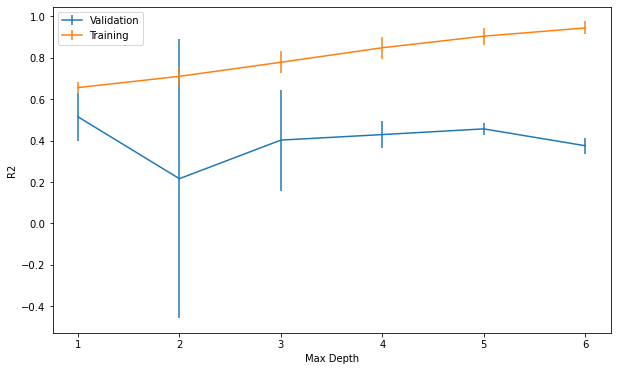

In [46]:
plotCV(cv_results)
plt.ylabel('R2')
plt.xlabel('Max Depth')
plt.legend(['Validation','Training',])
plt.show()

### Tuning Learning Rate

In [47]:
# Tuning learning_rate with max_depth = 2
import xgboost as xgb

learning_rate_params = np.arange(0.01, 0.21, 0.01)
cv_results = dict()

for param in learning_rate_params:
    
    model_XGB = xgb.XGBRegressor(objective ='reg:squarederror',
                                 max_depth = 2,
                                 learning_rate = param,
                                 n_estimators = 50,
                                 )
    cv_results[param] = crossVal(model_XGB, train_X, train_y)

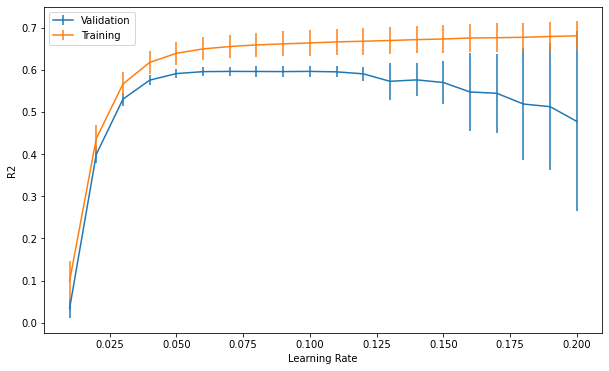

In [48]:
plotCV(cv_results)
plt.ylabel('R2')
plt.xlabel('Learning Rate')
plt.legend(['Validation','Training',])
plt.show()

### Tuning L2 Regularisation Parameter Lambda

In [49]:
# Tuning L2 regularization with max_depth = 1
import xgboost as xgb

lambda_params = np.arange(0, 110, 10)
cv_results = dict()

for param in lambda_params:
    
    model_XGB = xgb.XGBRegressor(objective ='reg:squarederror',
                                 max_depth = 2,
                                 learning_rate = 0.07,
                                 n_estimators = 50,
                                 reg_lambda = param
                                 )
    cv_results[param] = crossVal(model_XGB, train_X, train_y)

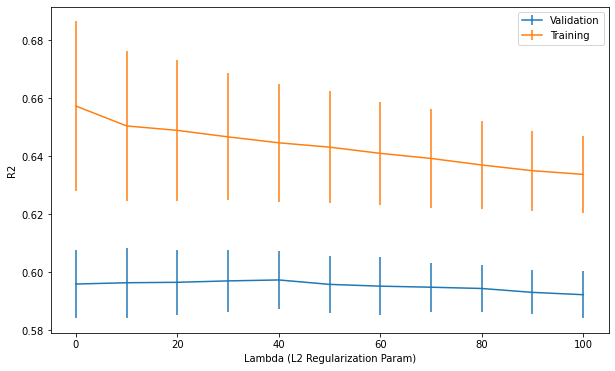

In [50]:
plotCV(cv_results)
plt.ylabel('R2')
plt.xlabel('Lambda (L2 Regularization Param)')
plt.legend(['Validation','Training',])
plt.show()

### Grid Search

In [51]:
# Grid Search XGBoost
max_depth_params = np.arange(1, 5, dtype=int)
lambda_params = np.arange(0, 70, 20)
learning_rate_params = np.arange(0.02, 0.11, 0.01)

grid_results_XGB = dict()
best_params = dict()
best_score = -10

for max_depth_param in max_depth_params:
    
    iter_res = dict()
    
    for lambda_param in lambda_params:
        
        iter2_res = dict()
    
        for learning_rate_param in learning_rate_params:

            model_XGB = xgb.XGBRegressor(objective ='reg:squarederror',
                                         max_depth = max_depth_param,
                                         learning_rate = learning_rate_param,
                                         n_estimators = 50,
                                         reg_lambda = lambda_param
                                         )

            iter_cv = crossVal(model_XGB, train_X, train_y)
            iter2_res[learning_rate_param] = iter_cv

            iter_score = np.mean(iter_cv['test'])

            if iter_score > best_score:

                best_score = iter_score

                best_params = {
                    'max_depth': max_depth_param,
                    'reg_lambda': lambda_param,
                    'learning_rate': learning_rate_param,
                    'score': best_score
                }

                print('Best r2 score: ' + str(best_score))
        
        iter_res[lambda_param] = iter2_res
            
    grid_results_XGB[max_depth_param] = iter_res

Best r2 score: 0.32809640779385596
Best r2 score: 0.4782284851130482
Best r2 score: 0.542869536127883
Best r2 score: 0.5715451001957568
Best r2 score: 0.5852867538185927
Best r2 score: 0.5908578658051205
Best r2 score: 0.5936954517868145
Best r2 score: 0.5945981708437376
Best r2 score: 0.5948130124826757
Best r2 score: 0.595199037005276
Best r2 score: 0.595630284404728
Best r2 score: 0.5957583262889339
Best r2 score: 0.5962283807802466
Best r2 score: 0.5965385170968747
Best r2 score: 0.5971206137687602
Best r2 score: 0.5973496312500444
Best r2 score: 0.5979081932933441


In [52]:
best_params

{'max_depth': 2,
 'reg_lambda': 40,
 'learning_rate': 0.07999999999999999,
 'score': 0.5979081932933441}

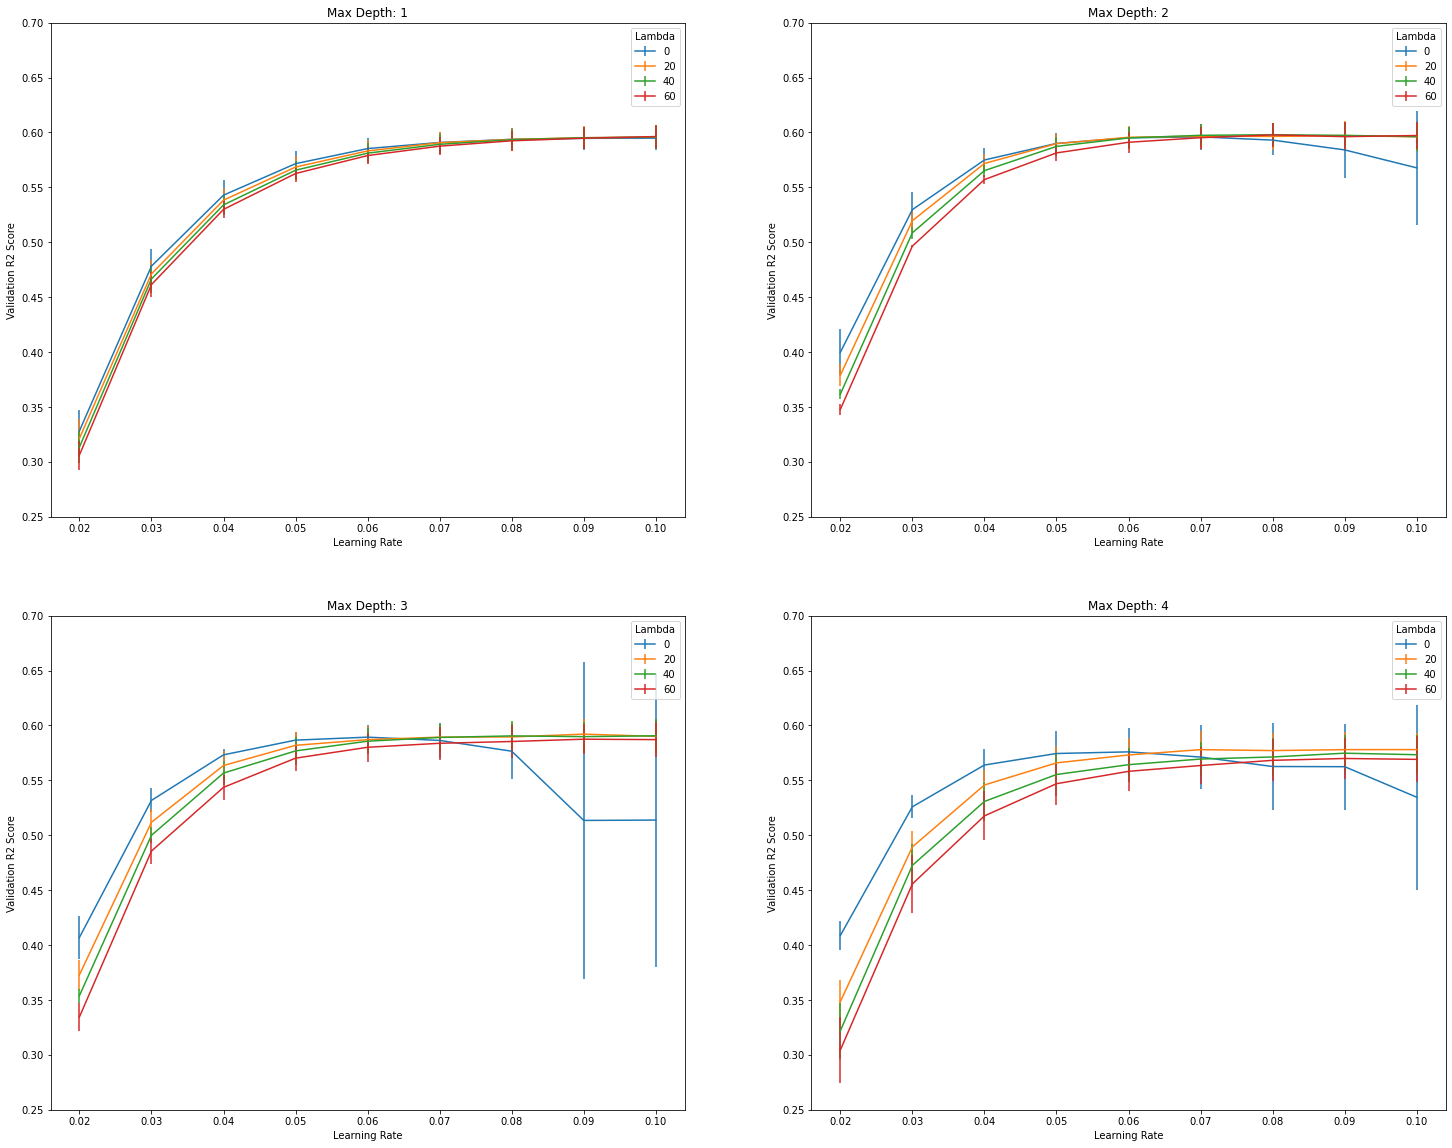

In [53]:
plt.figure(figsize=(25,20))
for i, param_1 in enumerate(grid_results_XGB.keys()):
    ax = plt.subplot(2, 2, i+1)
    for param_2 in grid_results_XGB[param_1].keys():
        plotSingleCV(ax, grid_results_XGB[param_1][param_2], plot_train=False)

    plt.legend(grid_results_XGB[param_1].keys(), title="Lambda")
    plt.xlabel("Learning Rate")
    plt.ylabel("Validation R2 Score")
    plt.yticks(np.arange(0.25, 0.75, 0.05))
    plt.title('Max Depth: ' + str(param_1))

### XGBoost Details
#### Training model after hyperparameter tuning

In [54]:
# Training model after hyperparameter tuning
model_XGB = xgb.XGBRegressor(objective ='reg:squarederror',
                          max_depth = 2,
                          learning_rate = 0.08,
                          n_estimators = 50,
                          reg_lambda = 40
                         )

printCVResults(crossVal(model_XGB, train_X, train_y))

{'val_means': 0.5979081932933441,
 'val_std': 0.010730552215836893,
 'train_means': 0.6500307580684475,
 'train_std': 0.022423776577990145}

#### Feature Importance

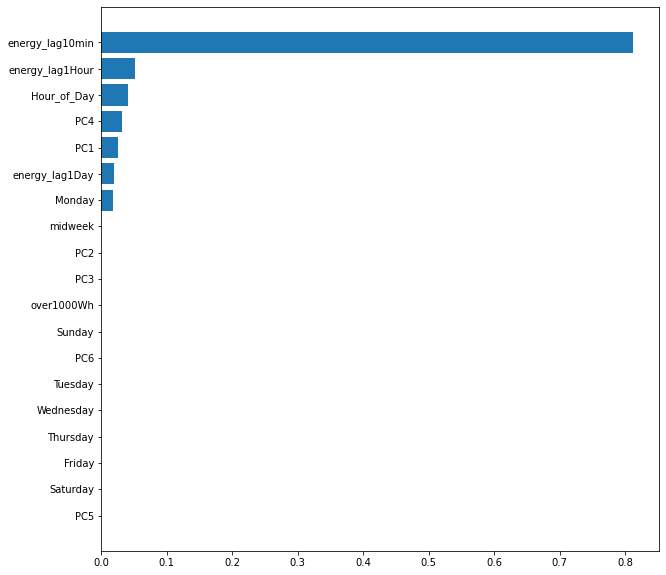

In [55]:
# Plot feature importance
sorted_idx = model_XGB.feature_importances_.argsort()

plt.figure(figsize=(10,10))
plt.barh(train_X.columns[sorted_idx], model_XGB.feature_importances_[sorted_idx])
plt.show()

#### Results after removing lag features

In [56]:
# Comparing performance when removing lag features
lag_features = ['energy_lag10min', 'energy_lag1Hour', 'energy_lag1Day']

cv_results = dict()

for i in range(4):
    cv_results[i] = crossVal(model_XGB, train_X.drop(lag_features[0:i], axis=1), train_y)

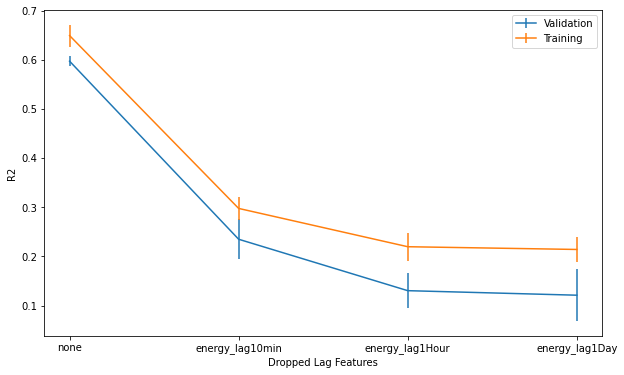

In [57]:
#Plot results of CV for different n_estimators
plotCV(cv_results)
plt.ylabel('R2')
plt.xlabel('Dropped Lag Features')
plt.xticks([0, 1, 2, 3], ['none', 'energy_lag10min', 'energy_lag1Hour', 'energy_lag1Day']) 
plt.legend(['Validation','Training',])
plt.show()

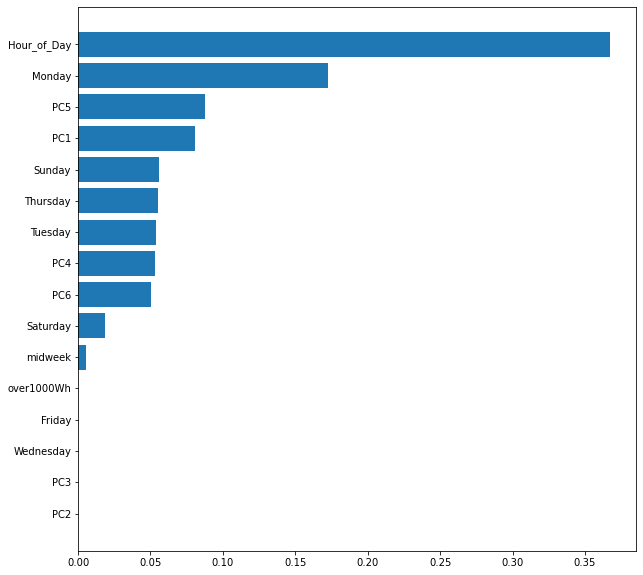

In [58]:
# Plot feature importance
sorted_idx = model_XGB.feature_importances_.argsort()

plt.figure(figsize=(10,10))
plt.barh(train_X.drop(['energy_lag10min', 'energy_lag1Hour', 'energy_lag1Day'], axis=1).columns[sorted_idx], model_XGB.feature_importances_[sorted_idx])
plt.show()

In [59]:
# Model trained with no lag features
printCVResults(crossVal(model_XGB, train_X.drop(lag_features, axis=1), train_y))

{'val_means': 0.12111201421780789,
 'val_std': 0.05269722891188399,
 'train_means': 0.21429398844112696,
 'train_std': 0.025931828953704997}

# Final Judgement
After comparing the performance of the two models, results show that the XGBoost have a better performance than Random Forest, this is true for both cases, with lag features and with no lag features. Also, XGBoost gave less importance to the feature `over1000Wh`, this means that XGBoost could capture the trend with outliers better.

For these reasons, the final judgement is to select XGBoost as our prediction model.
## Evaluation of XGBoost in Test Dataset

In [60]:
# Computing R2 in test dataset
model_XGB.fit(train_X, train_y)

y_preds = model_XGB.predict(test_X)
r2_score(test_y, y_preds)

0.583319224352747

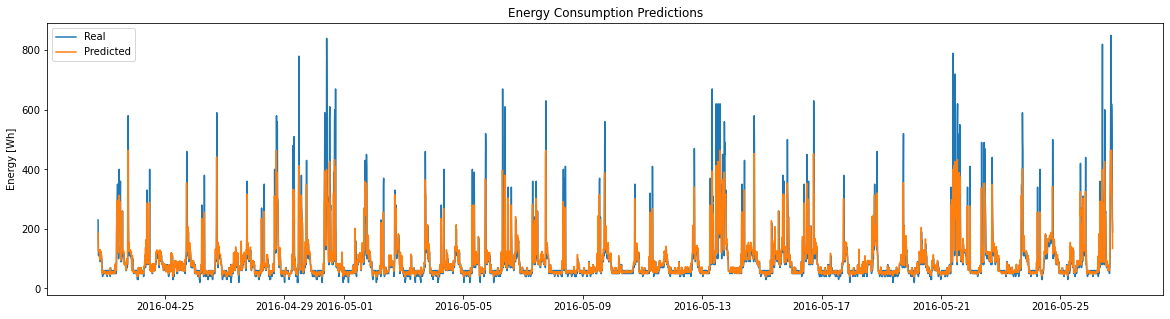

In [61]:
# Plot prediction results
plt.subplots(1,1,figsize=(20,5))
plt.plot(test_y)
plt.plot(test_y.index, y_preds)
plt.legend(['Real','Predicted',])
plt.ylabel('Energy [Wh]')
plt.title('Energy Consumption Predictions')
plt.show()

## Performance after removing lag features

In [62]:
model_XGB.fit(train_X.drop(lag_features, axis=1), train_y)

y_preds = model_XGB.predict(test_X.drop(lag_features, axis=1))
r2_score(test_y, y_preds)

0.11805352479351106

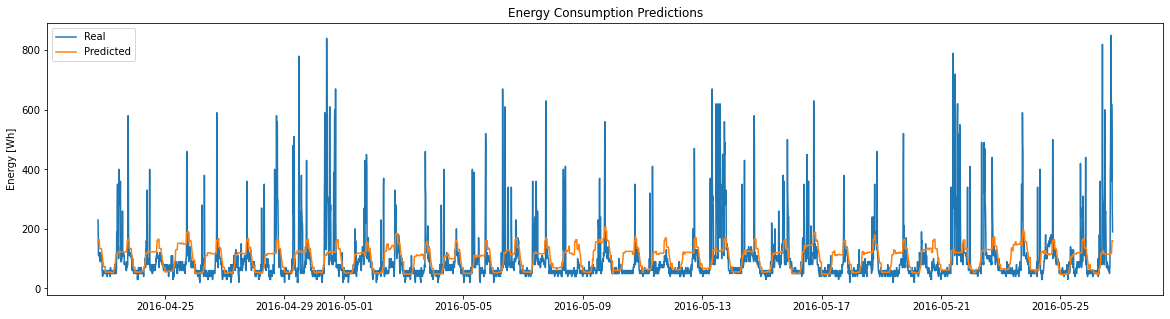

In [63]:
plt.subplots(1,1,figsize=(20,5))
plt.plot(test_y)
plt.plot(test_y.index, y_preds)
plt.legend(['Real','Predicted',])
plt.ylabel('Energy [Wh]')
plt.title('Energy Consumption Predictions')
plt.show()

# References

- <div class="csl-entry">Candanedo, L. M., Feldheim, V., &#38; Deramaix, D. (2017). Data driven prediction models of energy use of appliances in a low-energy house. <i>Energy and Buildings</i>, <i>140</i>, 81–97. https://doi.org/10.1016/j.enbuild.2017.01.083</div>

- <div class="csl-entry">Feng, S., &#38; Feng, Y. (2022). A Dual-Staged Attention Based Conversion-Gated Long Short Term Memory for Multivariable Time Series Prediction. <i>IEEE Access</i>, <i>10</i>, 368–379. https://doi.org/10.1109/ACCESS.2021.3136712</div>

- <div class="csl-entry">Munkhdalai, L., Munkhdalai, T., Pham, V. H., Li, M., Ryu, K. H., &#38; Theera-Umpon, N. (2022). Recurrent Neural Network-Augmented Locally Adaptive Interpretable Regression for Multivariate Time-Series Forecasting. <i>IEEE Access</i>, <i>10</i>, 11871–11885. https://doi.org/10.1109/ACCESS.2022.3145951</div>

- <div class="csl-entry">Pedregosa, F., Varoquaux, G., Gramfort, A., Michel V.  and Thirion, B., Grisel, O., Blondel, M., Prettenhofer P.  and Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., &#38; Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. <i>Journal of Machine Learning Research</i>, <i>12</i>, 2825–2830.</div>

- Hyndman, R.J., & Athanasopoulos, G. (2021) Forecasting: principles and practice, 3rd edition, OTexts: Melbourne, Australia. OTexts.com/fpp3. Accessed on 23-05-2022.

- RMIT. (2022). *COSC 2673/2793 | Machine Learning - Week 5 Lab Exercises: Training a Classification Model & Typical ML process* \[Jupyter Notebook\]. Canvas@RMIT University. https://rmit.instructure.com